Problem Statement:

The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights. You are expected to do the Market Risk Analysis using Python.

#### Import packages

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 

import warnings
warnings.filterwarnings("ignore")

#### Importing the dataset

In [62]:
stock_prices = pd.read_csv(r"C:\Users\lavan\Downloads\Market+Risk+Dataset (3).csv")

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [63]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

In [64]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [65]:
stock_prices.tail()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [66]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [67]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [114]:
stock_prices.describe().T


,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian_Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra_&_Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis_Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree_Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun_Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal_Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea_Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet_Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


## Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

In [ ]:
'Infosys', 'Indian_Hotel', 'Mahindra_&_Mahindra', 'Axis_Bank', 'SAIL',
                  'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone', 'Jet_Airways'

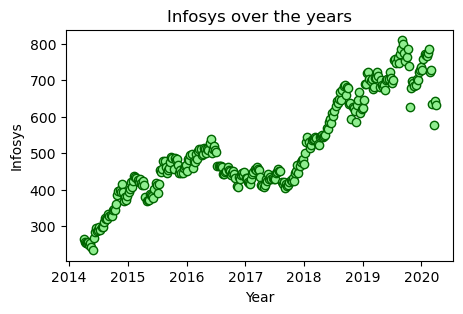

In [82]:
plt.figure(figsize = (5, 3))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='darkgreen', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')

plt.show()

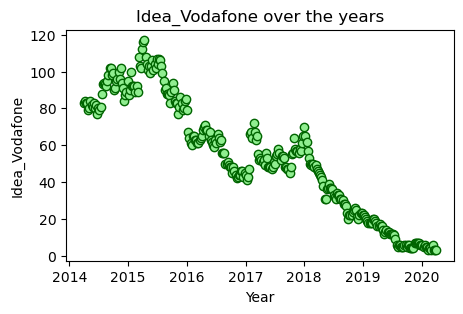

In [113]:
plt.figure(figsize = (5, 3))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Idea_Vodafone'], edgecolors='darkgreen', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Idea_Vodafone')
plt.title('Idea_Vodafone over the years')

plt.show()

In [129]:
# Create a list of stock names
stock_names = ['Indian_Hotel', 'Mahindra_&_Mahindra', 'Axis_Bank', 'SAIL', 'Shree_Cement', 
               'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone', 'Jet_Airways']

# Loop through each stock
for stock_name in stock_names:
    # Get the first value (beginning price) of the stock
    beginning_price = stock_prices[stock_name].iloc[0]

    # Get the last value (ending price) of the stock
    ending_price = stock_prices[stock_name].iloc[-1]

    # Calculate the return for the stock using the formula
    stock_return = ((ending_price - beginning_price) / beginning_price) * 100

    # Display the return for the stock
    print("Return for", stock_name + ":", stock_return)


Return for Indian_Hotel: 8.695652173913043
Return for Mahindra_&_Mahindra: -37.582417582417584
Return for Axis_Bank: 44.106463878327
Return for SAIL: -66.17647058823529
Return for Shree_Cement: 216.54338805700885
Return for Sun_Pharma: -36.57657657657658
Return for Jindal_Steel: -72.48322147651007
Return for Idea_Vodafone: -96.3855421686747
Return for Jet_Airways: -94.96402877697841


In [84]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [85]:
stock_returns.shape

(314, 10)

In [86]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [87]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

In [88]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

In [89]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


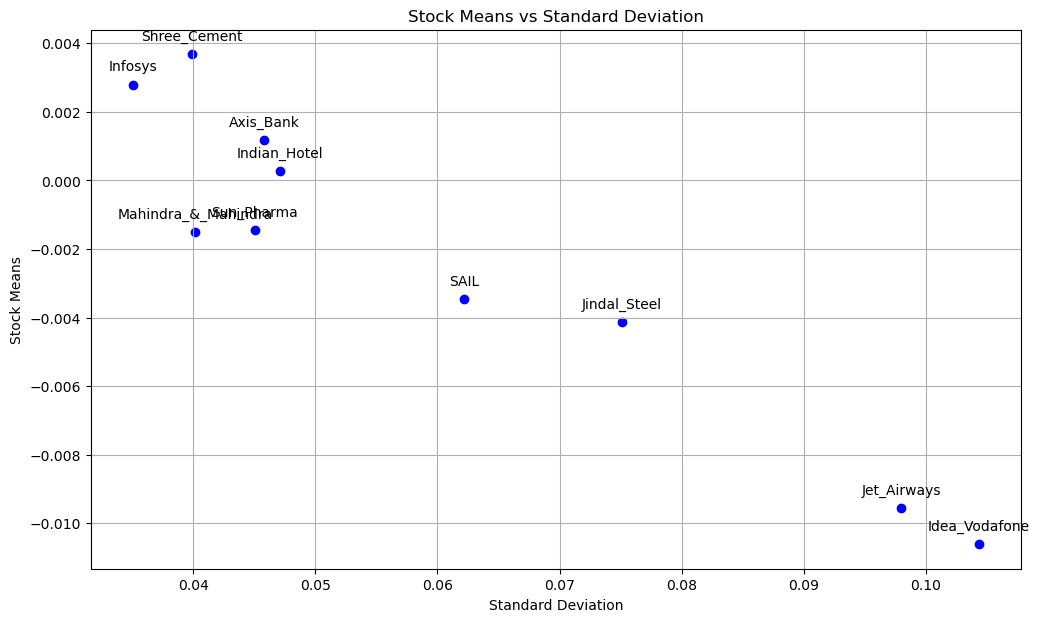

In [137]:
import matplotlib.pyplot as plt

# Stock means and standard deviations
stock_means = [0.002794, 0.000266, -0.001506, 0.001167, -0.003463, 0.003681, -0.001455, -0.004123, -0.010608, -0.009548]
stock_std = [0.035070, 0.047131, 0.040169, 0.045828, 0.062188, 0.039917, 0.045033, 0.075108, 0.104315, 0.097972]
stocks = ['Infosys', 'Indian_Hotel', 'Mahindra_&_Mahindra', 'Axis_Bank', 'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone', 'Jet_Airways']

# Plot
plt.figure(figsize=(12, 7))
plt.scatter(stock_std, stock_means, color='blue')
plt.title('Stock Means vs Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Stock Means')

# Annotate points
for i, stock in enumerate(stocks):
    plt.annotate(stock, (stock_std[i], stock_means[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()


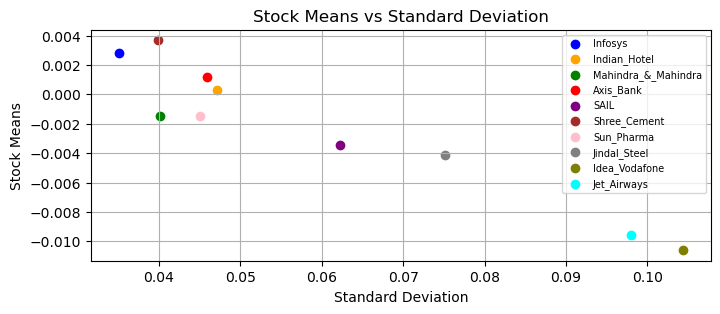

In [143]:
import matplotlib.pyplot as plt

# Stock means and standard deviations
stock_means = [0.002794, 0.000266, -0.001506, 0.001167, -0.003463, 0.003681, -0.001455, -0.004123, -0.010608, -0.009548]
stock_std = [0.035070, 0.047131, 0.040169, 0.045828, 0.062188, 0.039917, 0.045033, 0.075108, 0.104315, 0.097972]
stocks = ['Infosys', 'Indian_Hotel', 'Mahindra_&_Mahindra', 'Axis_Bank', 'SAIL', 'Shree_Cement', 'Sun_Pharma', 'Jindal_Steel', 'Idea_Vodafone', 'Jet_Airways']

# Define colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot
plt.figure(figsize=(8, 3))
for i, stock in enumerate(stocks):
    plt.scatter(stock_std[i], stock_means[i], color=colors[i], label=stock)

plt.title('Stock Means vs Standard Deviation')
plt.xlabel('Standard Deviation')
plt.ylabel('Stock Means')
plt.legend(loc='upper right', fontsize=7)

plt.grid(True)
plt.show()
